## **IMPORTING ALL NECESSARY LIBRARIES**

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

In [2]:
## LOADING THE DATASET - USE MNIST DATASET - with 70000 data 6:1 split
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## **DATA PRE PROCESSING**

* Image Size = 28 * 28 
* Conversion to categorical vales [0....9] = 10 class in total 

In [3]:
num_classes = 10
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

### conversion of class vectors to matrices of  binary class 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
x_train.shape

(60000, 28, 28, 1)

## **DEFINING AND COMPLING MODEL**

In [5]:
## CLASSIFICATION of IMAGES 
batch_size = 128
num_classes = 10

## DEFINING MODEL ARCH
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## Compling the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,380,938 (9.08 MB)

 Trainable params: 2,380,938 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

## **TRAINING THE CNN MODEL**

In [7]:
import os
!rm -r /kaggle/working/MyCheckpoint
os.mkdir('/kaggle/working/MyCheckpoint')

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


rm: cannot remove '/kaggle/working/MyCheckpoint': No such file or directory


In [8]:
### splitting 60000 data in test and validation

x_train, x_val = x_train[:55000], x_train[55000:]
y_train, y_val = y_train[:55000], y_train[55000:]

shuffle_index = np.random.permutation(55000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

print(x_train.shape, x_val.shape)

(55000, 28, 28, 1) (5000, 28, 28, 1)


In [9]:
checkpoint = ModelCheckpoint("/kaggle/working/MyCheckpoint/best_model-{epoch:02d}-{val_accuracy:.02f}.keras",
                             monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [10]:
epochs = 50
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_val, y_val), callbacks=[checkpoint,early_stop])
print("The model has successfully trained")

model.save('mnist.h5')

print("Saving the model")

Epoch 1/50


I0000 00:00:1724952856.467836      65 service.cc:145] XLA service 0x7a1818009630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724952856.467906      65 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 36/430 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0922 - loss: 2.3169

I0000 00:00:1724952860.884934      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1191 - loss: 2.2993
Epoch 1: val_accuracy improved from -inf to 0.37720, saving model to /kaggle/working/MyCheckpoint/best_model-01-0.38.keras
430/430 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.1192 - loss: 2.2992 - val_accuracy: 0.3772 - val_loss: 2.2214
Epoch 2/50
421/430 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2737 - loss: 2.2200
Epoch 2: val_accuracy improved from 0.37720 to 0.60040, saving model to /kaggle/working/MyCheckpoint/best_model-02-0.60.keras
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2745 - loss: 2.2196 - val_accuracy: 0.6004 - val_loss: 2.1231
Epoch 3/50
420/430 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4039 - loss: 2.1292
Epoch 3: val_accuracy improved from 0.60040 to 0.67580, saving model to /kaggle/working/MyCheckpoint/best_model-03-0.68.keras
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4045 - loss: 2.1285 - val_accuracy: 0.6758 - val_loss: 1.9940
Epoch 4/50
421/430 ━━━━━

## **EVALUATING MODEL**

In [11]:
scores = model.evaluate(x_train,y_train, verbose=0)
print("Training Accuracy: %.2f%% "% (scores[1]*100))
print('Training loss: %.2f%%' %(scores[0]*100))


Training Accuracy: 91.58% 
Training loss: 28.79%


In [12]:
scores = model.evaluate(x_val,y_val, verbose=0)
print("Validation Accuracy: %.2f%% " % (scores[1]*100))

Validation Accuracy: 94.04% 


In [13]:
scores = model.evaluate(x_test,y_test, verbose=0)
print("Test Accuracy: %.2f%% " % (scores[1]*100))


Test Accuracy: 92.40% 


Text(0, 0.5, 'acc')

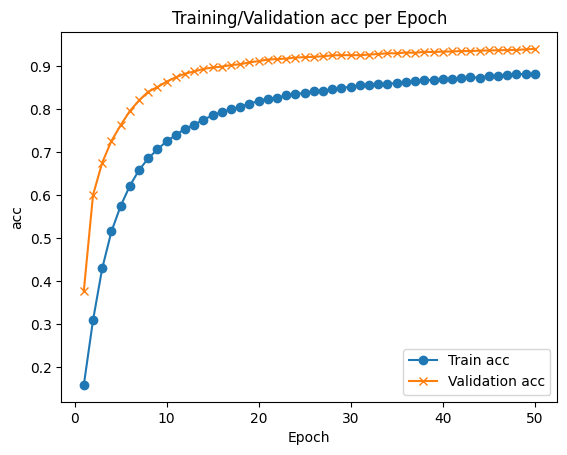

In [14]:
## PLOTTING THE MODEL TRAINNING DATA
history = hist
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + history.history['accuracy'],'o-')
ax.plot([None] + history.history['val_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc=0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

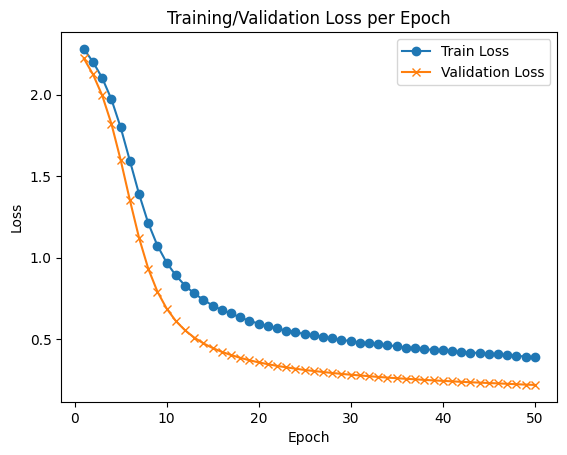

In [15]:
f, ax = plt.subplots()
ax.plot([None] + history.history['loss'],'o-')
ax.plot([None] + history.history['val_loss'], 'x-')
ax.legend(['Train Loss', 'Validation Loss'], loc=0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [16]:
## EVLAUTAING MODEL USING CONFUSION MATRIX
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predictions = model.predict(x_test)
confusion = confusion_matrix( np.argmax(y_test, axis=1), np.argmax(predictions, axis=1) )

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


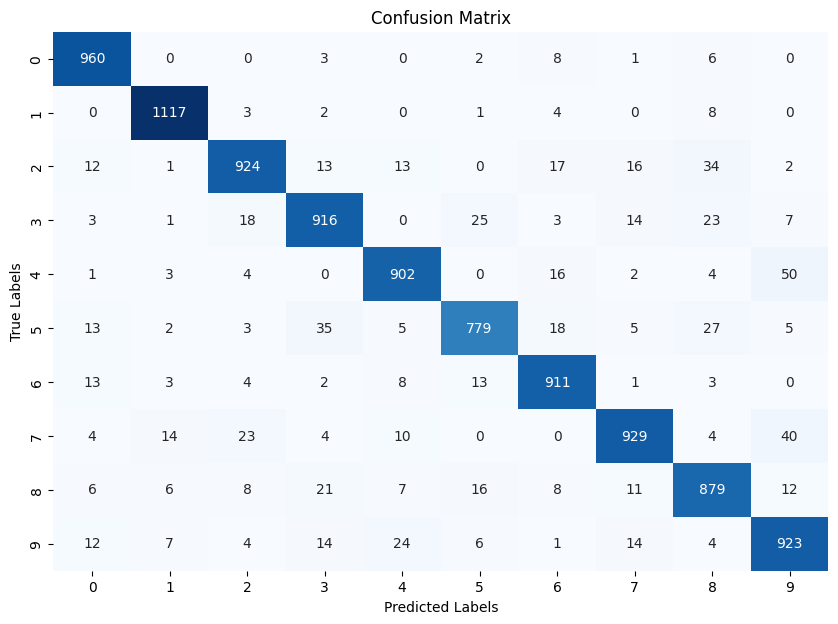

In [17]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
print(classification_report( np.argmax(y_test, axis=1),np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.93      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.92      0.92       982
           5       0.93      0.87      0.90       892
           6       0.92      0.95      0.94       958
           7       0.94      0.90      0.92      1028
           8       0.89      0.90      0.89       974
           9       0.89      0.91      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## **MODEL TESTING**

In [19]:
from keras.models import load_model
from PIL import ImageGrab, Image
import numpy as np
import matplotlib

In [20]:
##loading model
model_last = load_model('/kaggle/working/mnist.h5')
scores = model_last.evaluate(x_test,y_test)
print("Accuracy: %.2f%% " % (scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9081 - loss: 0.3101
Accuracy: 92.40% 


In [21]:
##loading best model
# model.load_weights("/kaggle/working/MyCheckpoint/best_model-40-0.93.keras")
# scores = model.evaluate(x_test,y_test)
# print("Accuracy: %.2f%% " % (scores[1]*100))

In [22]:
### function to predict the output 

def predict_digit(img):
    
#     img = img.resize((28,28))
#     img = img.convert('L')    ###RGB ----> GRAY
    
    img = np.array(img)
    img = img.reshape(1,28,28,1)    ## reshaping
    
    ### prediction of class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

In [23]:
## making prediction
index = 600
digit_img = x_test[index]
pred_class = predict_digit(digit_img)
print("Predicted class is : ", pred_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Predicted class is :  6


(-0.5, 27.5, 27.5, -0.5)

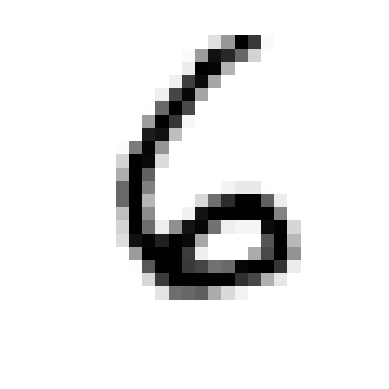

In [24]:
plt.imshow(np.squeeze(digit_img), cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [25]:
print("the True lable is : ", np.argmax(y_test[index]))

the True lable is :  6
